# Dijkstra

Реализуйте алгоритм Дейкстры поиска кратчайшего пути в графе.

Входные данные: В первой строке указаны два числа: число вершин и число ребер графа. Далее идут строки с описанием ребер. Их количество равно числу ребер. В каждой строке указаны 3 числа: исходящая вершина, входящая вершина, вес ребра. В последней строке указаны 2 номера вершины: начальная и конечная вершина, кратчайший путь между которыми нужно найти.

Выходные данные: минимальное расстояние между заданными вершинами. Если пути нет, то нужно вернуть -1.

Пример:

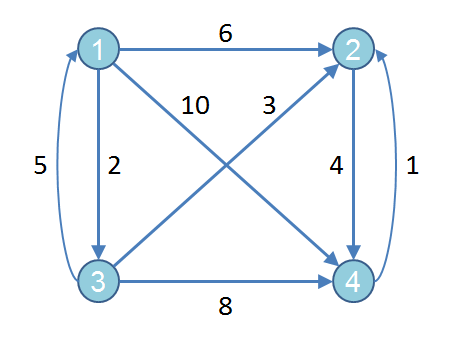

Sample Input:

    4 8
    1 2 6
    1 3 2
    1 4 10
    2 4 4
    3 1 5
    3 2 3
    3 4 8
    4 2 1
    1 4

Sample Output:

    9

In [15]:
import sys
from collections import defaultdict


with open('data/data17.txt', 'r') as f:
    
    def read_data(f):
        
        nodes_count, edges_count = map(int, f.readline().strip().split())
        graph = defaultdict(dict)
        node_costs = {}

        for i, line in enumerate(f):

            if edges_count == i:
                start_node, end_node = line.strip().split()
            else:
                node_1, node_2, str_cost = line.strip().split()
                node_costs.update({node_1: [float('inf'), ''], node_2: [float('inf'), '']})
                graph[node_1][node_2] = int(str_cost)
        
        return graph, node_costs, start_node, end_node
    
    
    def dijkstra(graph, node_costs, start_node):
        
        node = start_node
        node_costs[node] = [0, node]

        visited_nodes, node_candidates = set(), set()
        
        while True:

            for neighbour, neighbour_cost in graph[node].items():

                if neighbour not in visited_nodes:
                    new_neighbour_cost = node_costs[node][0] + neighbour_cost
                    if new_neighbour_cost < node_costs[neighbour][0]:
                        node_costs[neighbour][0], node_costs[neighbour][1] = new_neighbour_cost, node
            
            visited_nodes.add(node)
            print(node_costs)
            node_candidates = {node_candidate: node_cost[0] for node_candidate, node_cost in node_costs.items()
                               if node_candidate not in visited_nodes}
            if node_candidates:
                node = min(node_candidates, key=node_candidates.get)
            else:
                break

        return node_costs
    
    
    def print_shortest_path(node_costs, start_node, end_node):
        
        print('Shortest path:')
        prev_node = end_node
        print(prev_node)
        node = node_costs[prev_node][1]
        while node != prev_node:
            prev_node = node
            print(node)
            node = node_costs[prev_node][1]
            
    
    if __name__ == '__main__':
        
        graph, node_costs, start_node, end_node = read_data(f)

        if start_node not in node_costs or end_node not in node_costs:
            print('Length shortest path =', -1)
        else:
            node_costs = dijkstra(graph, node_costs, start_node)
            shortest_path_length = node_costs[end_node][0] if node_costs[end_node][0] != float('inf') else -1
            print('Length shortest path =', shortest_path_length)
            if shortest_path_length != -1:
                print_shortest_path(node_costs, start_node, end_node)
        


{'A': [0, 'A'], 'B': [8, 'A'], 'C': [2, 'A'], 'D': [5, 'A'], 'F': [inf, ''], 'E': [inf, ''], 'G': [inf, ''], 'H': [inf, '']}
{'A': [0, 'A'], 'B': [8, 'A'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [inf, ''], 'E': [7, 'C'], 'G': [inf, ''], 'H': [inf, '']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [10, 'D'], 'E': [5, 'D'], 'G': [7, 'D'], 'H': [inf, '']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [10, 'D'], 'E': [5, 'D'], 'G': [6, 'E'], 'H': [inf, '']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [10, 'D'], 'E': [5, 'D'], 'G': [6, 'E'], 'H': [inf, '']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [8, 'G'], 'E': [5, 'D'], 'G': [6, 'E'], 'H': [12, 'G']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [8, 'G'], 'E': [5, 'D'], 'G': [6, 'E'], 'H': [11, 'F']}
{'A': [0, 'A'], 'B': [6, 'D'], 'C': [2, 'A'], 'D': [4, 'C'], 'F': [8, 'G'], 'E': [5, 'D'], 'G': [6, 'E'], 'H': [11, 'F']}
Length shortest 

---

# Breadth First Search: Mapper

Реализуйте mapper в задаче поиска кратчайшего пути с помощью Hadoop Streaming.

Входные и выходные данные: в качестве ключа идет номер вершины, значение состоит из двух полей, разделенных табуляцией:

1. Минимальное расстояние до данной вершины (если его еще нет, то пишется INF)
2. Список исходящих вершин (через "," в фигурных скобках) 

Пример работы mapper на второй итерации обработки следующего графа:
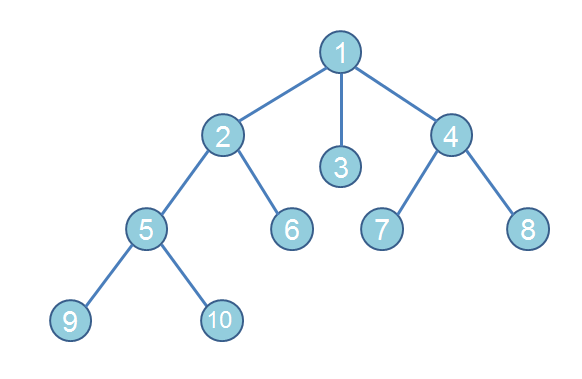
Sample Input:

    1	0	{2,3,4}
    2	1	{5,6}
    3	1	{}
    4	1	{7,8}
    5	INF	{9,10}
    6	INF	{}
    7	INF	{}
    8	INF	{}
    9	INF	{}
    10	INF	{}
Sample Output:

    1	0	{2,3,4}
    2	1	{}
    3	1	{}
    4	1	{}
    2	1	{5,6}
    5	2	{}
    6	2	{}
    3	1	{}
    4	1	{7,8}
    7	2	{}
    8	2	{}
    5	INF	{9,10}
    9	INF	{}
    10	INF	{}
    6	INF	{}
    7	INF	{}
    8	INF	{}
    9	INF	{}
    10	INF	{}

In [40]:
with open('data/data18.txt') as f:
    
    for line in f:
        node, str_cost, str_neighbours = line.split()
        cost = str_cost if str_cost == 'INF' else int(str_cost)
        
        print(f'{node}\t{cost}\t{str_neighbours}')
        
        if str_neighbours != '{}':
            for neighbour_node in str_neighbours.strip('{}').split(','):
                neighbour_cost = str_cost if str_cost == 'INF' else cost+1
                print(f'{neighbour_node}\t{neighbour_cost}\t{{}}')

1	0	{2,3,4}
2	1	{}
3	1	{}
4	1	{}
2	1	{5,6}
5	2	{}
6	2	{}
3	1	{}
4	1	{7,8}
7	2	{}
8	2	{}
5	INF	{9,10}
9	INF	{}
10	INF	{}
6	INF	{}
7	INF	{}
8	INF	{}
9	INF	{}
10	INF	{}


---

# Breadth First Search: Reducer

Реализуйте reducer в задаче поиска кратчайшего пути с помощью Hadoop Streaming.

Входные и выходные данные: в качестве ключа идет номер вершины, значение состоит из двух полей, разделенных табуляцией:

1. Минимальное расстояние до данной вершины (если его еще нет, то пишется INF)
1. Список исходящих вершин (через "," в фигурных скобках).

Пример работы reducer на второй итерации обработки следующего графа:
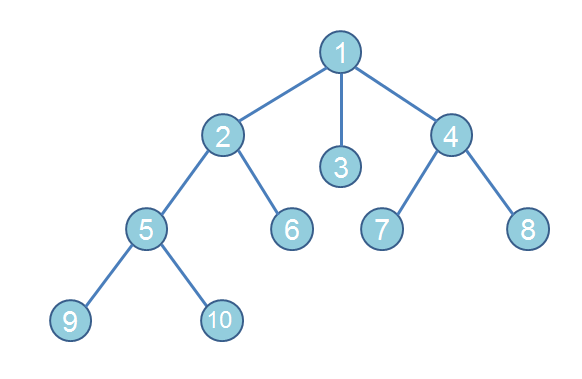
Sample Input:

    1	0	{2,3,4}
    10	INF	{}
    10	INF	{}
    2	1	{}
    2	1	{5,6}
    3	1	{}
    3	1	{}
    4	1	{}
    4	1	{7,8}
    5	2	{}
    5	INF	{9,10}
    6	2	{}
    6	INF	{}
    7	2	{}
    7	INF	{}
    8	2	{}
    8	INF	{}
    9	INF	{}
    9	INF	{}
Sample Output:

    1	0	{2,3,4}
    10	INF	{}
    2	1	{5,6}
    3	1	{}
    4	1	{7,8}
    5	2	{9,10}
    6	2	{}
    7	2	{}
    8	2	{}
    9	INF	{}

In [86]:
with open('data/data19.txt') as f:
    
    last_node, last_cost, last_str_neighbours = None, float('inf'), {}

    for line in f:

        node, str_cost, str_neighbours = line.split()
        cost = float('inf') if str_cost == 'INF' else int(str_cost)

        if last_node and node != last_node:
            last_str_cost = 'INF' if last_cost == float('inf') else last_cost
            print(f'{last_node}\t{last_str_cost}\t{last_str_neighbours}')
            last_node, last_cost, last_str_neighbours = None, float('inf'), {}

        last_node = node

        if cost < last_cost:
            last_cost = cost
        if len(str_neighbours) != 2:
            last_str_neighbours = str_neighbours

    if last_node:
        last_str_cost = 'INF' if last_cost == float('inf') else last_cost
        print(f'{last_node}\t{last_str_cost}\t{last_str_neighbours}')

1	0	{2,3,4}
10	INF	{}
2	1	{5,6}
3	1	{}
4	1	{7,8}
5	2	{9,10}
6	2	{}
7	2	{}
8	2	{}
9	INF	{}
